# Introduction: 

The Canadian Institute for Advanced Research, 10 classes  is a subset of Tiny image dataset that consists of 60000 x 32 x 32 color images. The images are labelled with one of the 10 mutually exclusive classes: __airplanes, automobiles, bird, cat, deer, dog, frog, horse, ship and truck.__

## Importing the dataset

In [1]:
from tensorflow.keras.datasets import cifar10
import tensorflow as tf

In [2]:
tf.__version__

'2.10.0'

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

## Importing the required packages

In [4]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

## Displaying the data in form of images

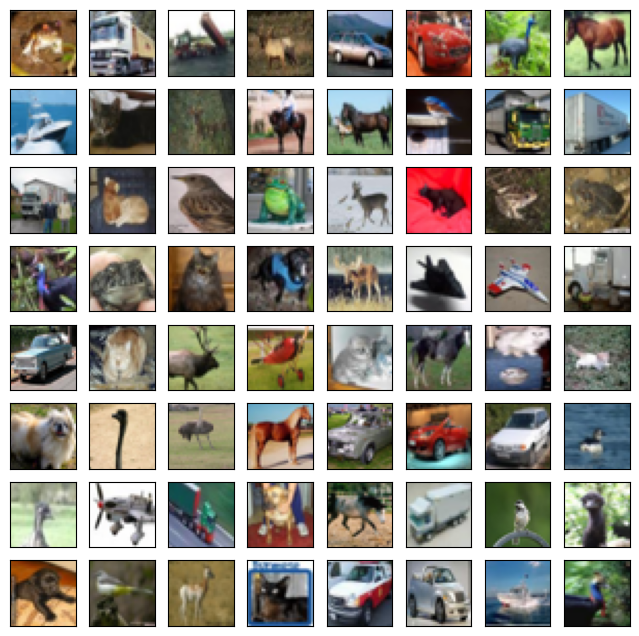

In [5]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1, xticks=[],yticks=[])
    ax.imshow(x_train[i])
plt.show()

## Reshape labels to 1D array

* Flatten the image (32x32x3) = 3072

In [6]:
y_train= y_train.flatten()
y_test = y_test.flatten()

## Flatten the images

In [7]:
x_train_flat = x_train.reshape(x_train.shape[0],-1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

# Normalize the pixel Values

In [8]:
x_train_flat = x_train_flat /255.0
x_test_flat = x_test_flat / 255.0

In [9]:
x_test_flat.shape

(10000, 3072)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
x_train_flat = scaler.fit_transform(x_train_flat)
x_test_flat = scaler.fit_transform(x_test_flat)

In [12]:
x_train_flat.shape,x_test_flat.shape

((50000, 3072), (10000, 3072))

## Implementing PCA to find the best fit

In [13]:
pca = PCA()
transformed_data = pca.fit(x_train_flat)

In [14]:
k = 0 
total = 0
while total < 0.99:
    total = total + pca.explained_variance_ratio_[k]
    k += 1
k

662

## Implementing the n_component feature to reduce the processing speed

In [15]:
pca_n = PCA(n_components = k, whiten = True)
x_transformed = pca_n.fit_transform(x_train_flat)

In [16]:
x_transformed.shape

(50000, 662)

In [17]:
x_approx = pca_n.inverse_transform(x_transformed)

# Plotting the reconstructed Image

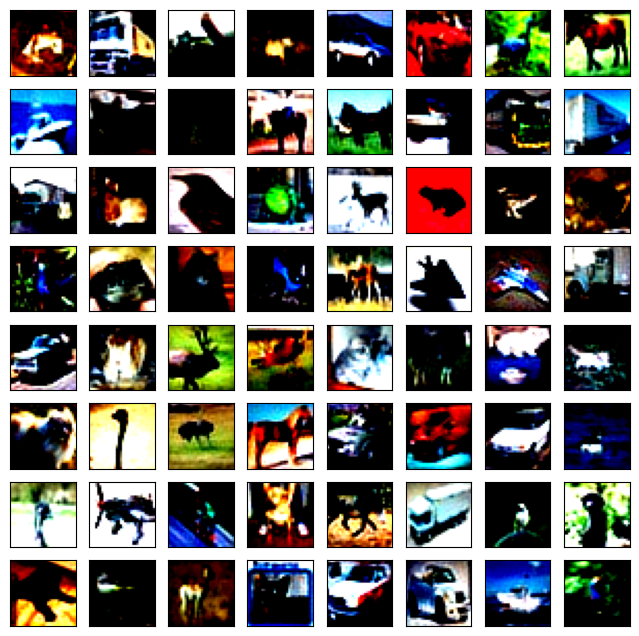

In [18]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1, xticks=[],yticks=[])
    ax.imshow(x_approx[i].reshape(32,32,3).clip(0,1))
plt.show()

In [58]:
x_transformed_resize = x_transformed[:10000,:]
x_transformed_resize.shape

(10000, 662)

In [59]:
y_train_resize = y_train[:10000]

In [71]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_transformed, y_train)

RandomForestClassifier()

In [88]:
clf.score(x_transformed, y_train)

1.0

In [79]:
x_test_reshaped = x_test_flat[:,:662]

In [91]:
clf.score(x_test_reshaped, y_test) * 100

9.2

In [82]:
y_preds = clf.predict(x_test_reshaped)

(10000,)

In [84]:
from sklearn.metrics import classification_report

In [92]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.10      0.06      0.07      1000
           1       0.12      0.16      0.14      1000
           2       0.14      0.15      0.14      1000
           3       0.05      0.04      0.04      1000
           4       0.13      0.18      0.15      1000
           5       0.05      0.06      0.05      1000
           6       0.07      0.04      0.05      1000
           7       0.11      0.08      0.09      1000
           8       0.06      0.03      0.04      1000
           9       0.07      0.12      0.09      1000

    accuracy                           0.09     10000
   macro avg       0.09      0.09      0.09     10000
weighted avg       0.09      0.09      0.09     10000

